<a href="https://colab.research.google.com/github/gnanithag5/Secure-BYOD-Bring-Your-Own-Device-in-a-Corporate-Environment/blob/main/BYOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00


In [ ]:
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.3 MB/s eta 0:00:00


Data Generation

In [ ]:
# Snippet 1: Data Generation and Initialization
import pandas as pd
import numpy as np
import random
from faker import Faker

# Initialize Faker for generating random MAC addresses, IPs, and timestamps
faker = Faker()

# Number of devices to simulate
num_devices = 100

# Helper function to generate random MAC addresses
def generate_mac():
    return faker.mac_address()

# Helper function to generate OS with version based on device type
def generate_os(device_type):
    if device_type == "Laptop":
        os_types = {
            "Windows": ["10", "11"],
            "macOS": ["Monterey", "Ventura"],
            "Linux": ["Ubuntu 20.04", "Fedora 36", "Debian 11"],
        }
    elif device_type in ["Smartphone", "Tablet"]:
        os_types = {
            "Android": ["12", "13"],
            "iOS": ["15", "16"],
        }
    else:
        return "Unknown OS"

    os_choice = random.choice(list(os_types.keys()))
    version = random.choice(os_types[os_choice])
    return f"{os_choice} {version}"

# Helper function to generate port numbers with weighted probabilities
def generate_port():
    ports = [443, 8443, 80, 8080, 22, 21, 25, 3389]
    probabilities = [0.5, 0.3, 0.05, 0.05, 0.03, 0.03, 0.02, 0.02]
    return random.choices(ports, probabilities)[0]

# Function to generate synthetic data
def generate_device_data(num_devices=30):
    device_data = {
        "Device_ID": [f"Device_{i+1}" for i in range(num_devices)],
        "MAC_Address": [generate_mac() for _ in range(num_devices)],
        "Device_Type": np.random.choice(["Laptop", "Smartphone", "Tablet"], size=num_devices),
        "Role": np.random.choice(["End-Guest", "Employee", "Administrator"], size=num_devices, p=[0.1, 0.7, 0.2]),
        "Destination_Type": np.random.choice(["Network", "App", "Cloud"], size=num_devices),
        "Timestamp": [faker.date_time_this_year().strftime("%Y-%m-%d %H:%M:%S") for _ in range(num_devices)],
        "Encryption_Type": np.random.choice(["AES", "DSA", "ECC", "RSA"], size=num_devices, p=[0.45, 0.05, 0.45, 0.05]),
        "Jailbreak_Status": np.random.choice(["Yes", "No"], size=num_devices, p=[0.1, 0.9]),
        "Latency_ms": np.random.normal(50, 10, size=num_devices).round(2),
        "Throughput_Mbps": np.random.normal(100, 15, size=num_devices).round(2),
        "Port": [generate_port() for _ in range(num_devices)],
        "IP_Address": [f"192.168.1.{random.randint(0, 255)}" if random.random() < 0.95 else faker.ipv4() for _ in range(num_devices)],
        "Screen_Time": np.random.choice(["1", "5", "10", "30", "60"], size=num_devices, p=[0.05, 0.3, 0.55, 0.05, 0.05]),
    }

    # Add OS_Version based on Device_Type
    device_data["OS_Version"] = [generate_os(device_type) for device_type in device_data["Device_Type"]]

    # Create a DataFrame
    df = pd.DataFrame(device_data)

    # Save the dataset to a CSV file
    df.to_csv("BYOD_Device_Data.csv", index=False)

    return df

# Generate and display sample data when running this snippet independently
if __name__ == "__main__":
    df = generate_device_data(num_devices)
    print(df.head())

  Device_ID        MAC_Address Device_Type       Role Destination_Type  \
0  Device_1  82:ac:a2:1a:36:d4      Laptop  End-Guest              App   
1  Device_2  6c:86:46:16:75:f8  Smartphone   Employee              App   
2  Device_3  12:90:3a:81:22:dc  Smartphone   Employee          Network   
3  Device_4  b8:c2:94:c0:11:cc  Smartphone   Employee            Cloud   
4  Device_5  7e:60:91:80:71:1a      Tablet   Employee            Cloud   

             Timestamp Encryption_Type Jailbreak_Status  Latency_ms  \
0  2024-10-16 10:40:59             ECC              Yes       48.64   
1  2024-11-17 04:48:45             ECC               No       70.36   
2  2024-05-31 19:46:26             ECC               No       51.37   
3  2024-02-16 11:15:05             AES              Yes       50.11   
4  2024-08-28 15:09:16             ECC              Yes       33.65   

   Throughput_Mbps  Port     IP_Address Screen_Time       OS_Version  
0            94.23   443   192.168.1.88          10  Linu

Mobile Device Management

  Device_ID        MAC_Address Device_Type       Role Destination_Type  \
0  Device_1  82:ac:a2:1a:36:d4      Laptop  End-Guest              App   
1  Device_2  6c:86:46:16:75:f8  Smartphone   Employee              App   
2  Device_3  12:90:3a:81:22:dc  Smartphone   Employee          Network   
3  Device_4  b8:c2:94:c0:11:cc  Smartphone   Employee            Cloud   
4  Device_5  7e:60:91:80:71:1a      Tablet   Employee            Cloud   

             Timestamp Encryption_Type Jailbreak_Status  Latency_ms  \
0  2024-10-16 10:40:59             ECC              Yes       48.64   
1  2024-11-17 04:48:45             ECC               No       73.36   
2  2024-05-31 19:46:26             ECC               No       56.37   
3  2024-02-16 11:15:05             AES              Yes       50.11   
4  2024-08-28 15:09:16             ECC              Yes       33.65   

   Throughput_Mbps  Port     IP_Address  Screen_Time       OS_Version  \
0          94.2300   443   192.168.1.88           10  L

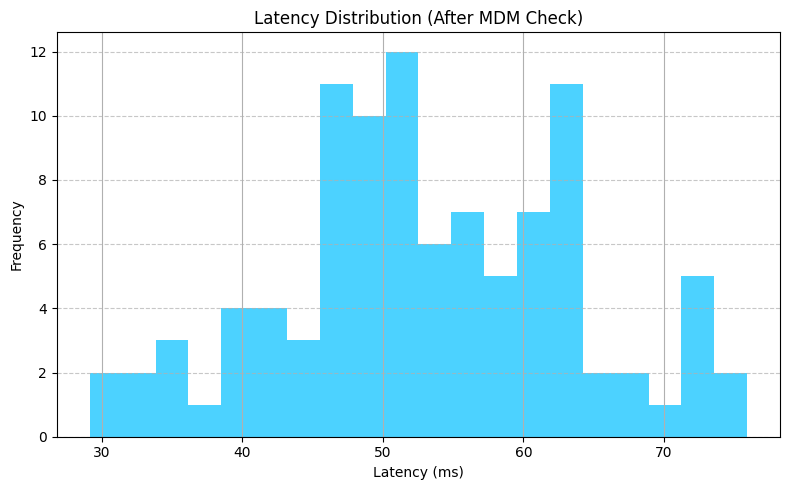

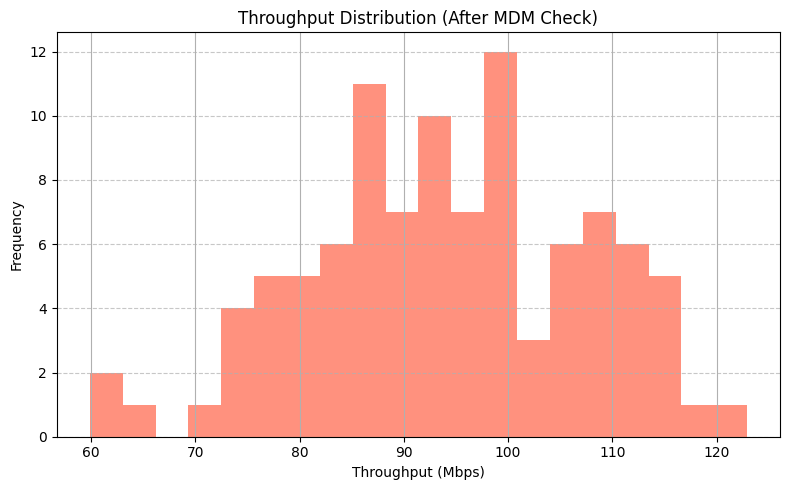


Access Status Counts:
Compliance_Status
Compliant        72
Non-Compliant    28
Name: count, dtype: int64


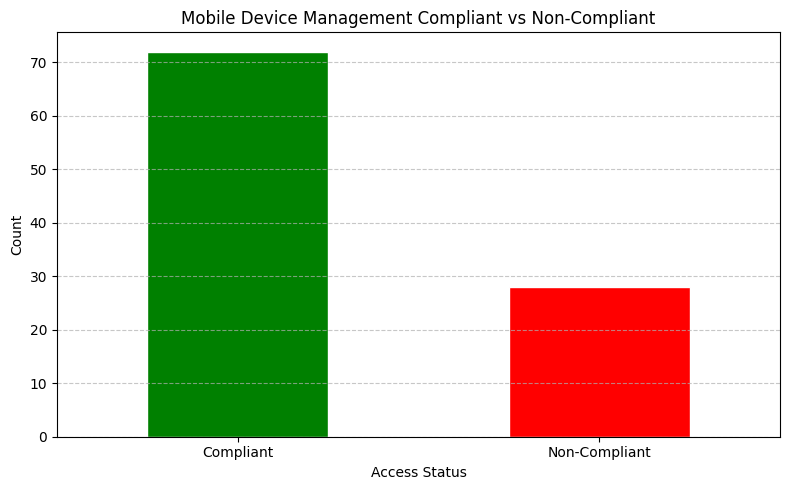

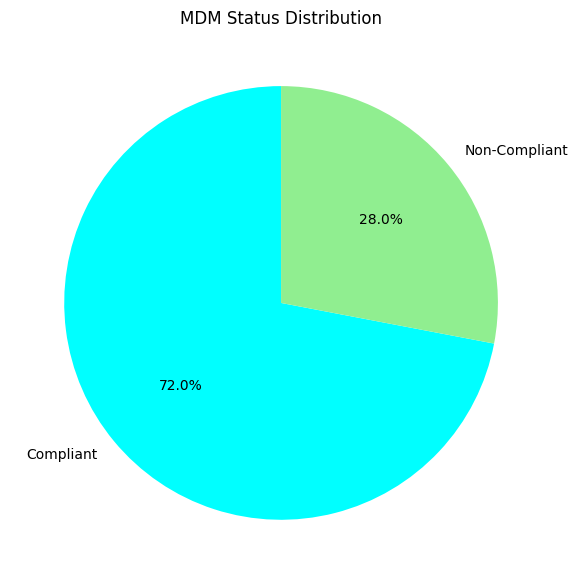

In [ ]:
#MDM
import pandas as pd
import matplotlib.pyplot as plt

# Load the existing dataset
df = pd.read_csv("BYOD_Device_Data.csv")

# Define policy checks for MDM compliance
def check_compliance(row):
    reasons = []

    # Policy: Check OS version compliance
    os_policy = {
        "Windows": ["10", "11"],
        "macOS": ["Monterey", "Ventura"],
        "Android": ["12", "13"],
        "iOS": ["15", "16"],
        "Linux": ["Ubuntu 20.04", "Fedora 36", "Debian 11"],
    }
    os_type, os_version = row["OS_Version"].split(" ", 1)
    if os_type in os_policy and os_version not in os_policy[os_type]:
        reasons.append(f"OS version {row['OS_Version']} not compliant")

    # Policy: Check encryption compliance
    encryption_compliant = ["AES", "ECC"]  # Example compliant encryption standards
    if row["Encryption_Type"] not in encryption_compliant:
        reasons.append(f"Encryption standard {row['Encryption_Type']} not compliant")

    # Policy: Check jailbreak status
    if row["Jailbreak_Status"] == "Yes":
        reasons.append("Device is jailbroken")

# Policy: Check screen time compliance
    if row["Screen_Time"] > 10:
        reasons.append("Screen time exceeded 10 minutes and was adjusted to comply with policy")

    # Determine compliance status
    if not reasons:
        return "Compliant", ""
    return "Non-Compliant", "; ".join(reasons)

# Apply compliance check to each row
df["Compliance_Status"], df["Non_Compliance_Reason"] = zip(*df.apply(check_compliance, axis=1))

# Define performance adjustments for compliant devices
def adjust_performance_random(row):
    if row["Compliance_Status"] == "Compliant":
        # Randomly increase latency between 1 and 5 ms
        latency_increase = random.randint(1, 5)
        row["Latency_ms"] += latency_increase

        # Randomly decrease throughput between 1% and 10%
        throughput_decrease_percent = random.randint(1, 10)
        row["Throughput_Mbps"] *= (1 - throughput_decrease_percent / 100)  # Decrease throughput
    return row

df = df.apply(adjust_performance_random, axis=1)

# Save the updated dataset to a new CSV file
df.to_csv("MDM_Compliant_Data.csv", index=False)

# Display a sample of the updated dataframe
print(df.head())

# Analyze the impact on latency and throughput
latency_avg = df["Latency_ms"].mean()
throughput_avg = df["Throughput_Mbps"].mean()

print(f"\nAverage Latency: {latency_avg:.2f} ms")
print(f"Average Throughput: {throughput_avg:.2f} Mbps")

# Plot latency and throughput distributions
plt.figure(figsize=(8, 5))
df["Latency_ms"].hist(bins=20, alpha=0.7, color="#00BFFF")
plt.title("Latency Distribution (After MDM Check)")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
df["Throughput_Mbps"].hist(bins=20, alpha=0.7, color="#FF6347")
plt.title("Throughput Distribution (After MDM Check)")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

import pandas as pd

# Assuming 'updated_df' is the DataFrame with the last column having "Yes" and "No" values
# Count the occurrences of each value in the last column
access_counts = df.iloc[:, -2].value_counts()  # Get the last column dynamically

# Print the counts
print("\nAccess Status Counts:")
print(access_counts)

import matplotlib.pyplot as plt

# Assuming `access_counts` contains the counts of "Yes" and "No" values
# Example: access_counts = pd.Series({'Yes': 3, 'No': 2})

# Bar Chart
plt.figure(figsize=(8, 5))
access_counts.plot(kind='bar', color=['green', 'red'], edgecolor='white')
plt.title("Mobile Device Management Compliant vs Non-Compliant")
plt.xlabel("Access Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
access_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['cyan', '#90EE90'], labels=access_counts.index)
plt.title("MDM Status Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.tight_layout()
plt.show()


Network Access Control

Adjusted data saved to 'Adjusted_BYOD_Data.csv'.
   Device_ID        MAC_Address Device_Type           Role Destination_Type  \
0   Device_2  6c:86:46:16:75:f8  Smartphone       Employee              App   
1   Device_3  12:90:3a:81:22:dc  Smartphone       Employee          Network   
2   Device_8  88:aa:c7:6a:37:a0      Tablet       Employee              App   
3   Device_9  7a:24:04:f2:e1:3b      Laptop  Administrator              App   
4  Device_12  20:6e:aa:16:ae:b2  Smartphone       Employee              App   

             Timestamp Encryption_Type Jailbreak_Status  Latency_ms  \
0  2024-11-17 04:48:45             ECC               No       75.36   
1  2024-05-31 19:46:26             ECC               No       59.37   
2  2024-05-18 14:57:29             ECC               No       49.81   
3  2024-03-05 14:10:47             AES               No       59.61   
4  2024-09-22 03:35:44             AES               No       51.58   

   Throughput_Mbps  Port     IP_Address  Screen_T

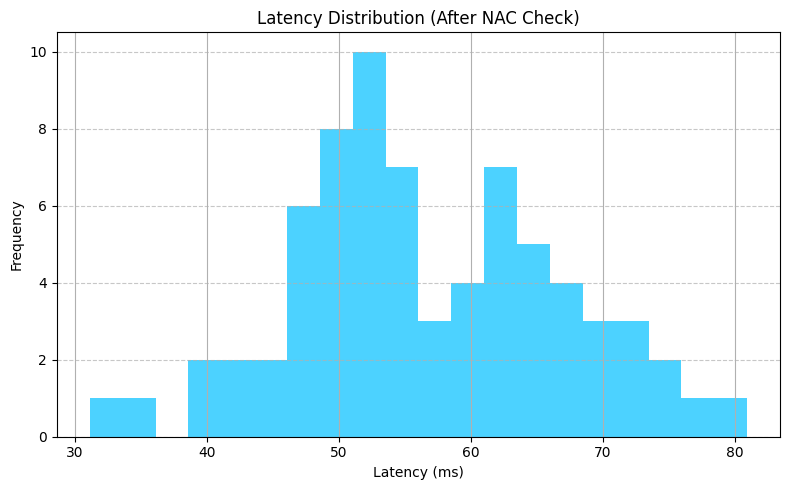

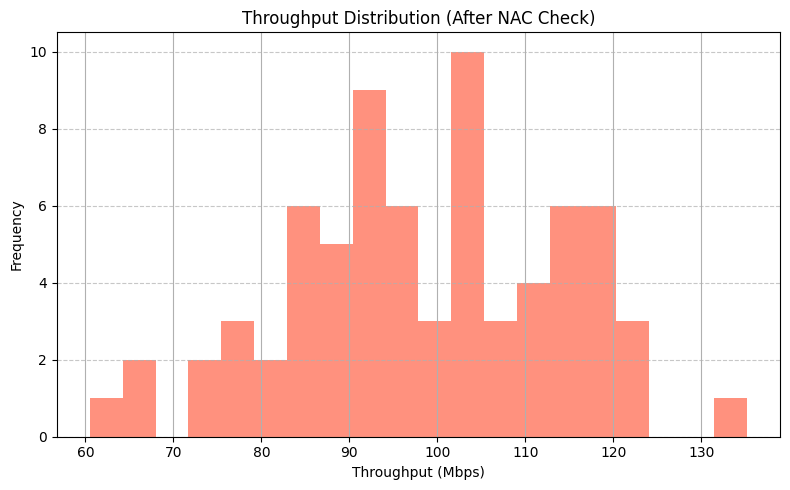


Access Status Counts:
Access_Status
Active           47
Access Denied    25
Name: count, dtype: int64


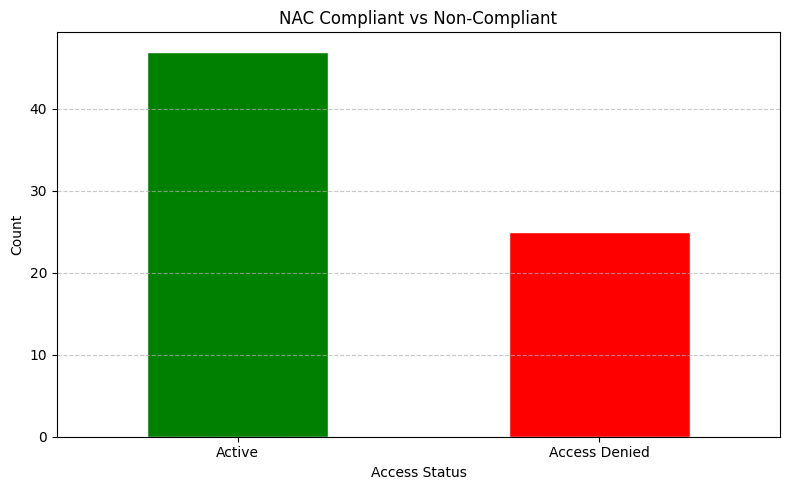

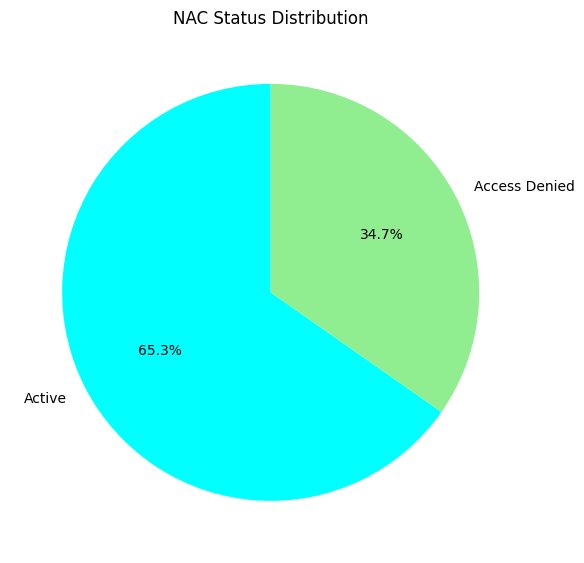

In [ ]:
#NAC
import ipaddress
import pandas as pd


# Device Class
class Device:
    def __init__(self, device_id, device_type, is_compliant, user_role, destination, ip_address, port, Latency_ms, Throughput_Mbps,access_code=None):
        self.device_id = device_id
        self.device_type = device_type
        self.is_compliant = is_compliant
        self.user_role = user_role.lower()
        self.destination = destination.lower()
        self.ip_address = ip_address
        self.port = port
        self.access_granted = False
        self.assigned_resource = None
        self.vlan_segment = None
        self.latency_ms = Latency_ms
        self.throughput_Mbps = Throughput_Mbps
        self.access_code = access_code  # For guests
        self.access_status = "Access Denied"  # Default status


# NACSystem Class
class NACSystem:
    def __init__(self, allowed_ip_range, secure_ports):
        self.allowed_roles = ["employee", "admin"]
        self.allowed_destinations = {
            "network": "Corporate Network Resources",
            "app": "Internal Applications",
            "cloud": "Cloud Storage Services",
        }
        self.network_segments = {
            "employee": "VLAN 100 - Employee Network",
            "admin": "VLAN 200 - Admin Network",
            "end-guest": "Guest Network",
        }
        self.guest_access_code = "NETGUEST"
        self.allowed_ip_network = ipaddress.ip_network(allowed_ip_range)
        self.secure_ports = secure_ports

    def authenticate_device(self, device):
        if device.user_role == "end-guest":
            return device.access_code == self.guest_access_code
        elif device.user_role in self.allowed_roles:
            return True
        return False

    def check_ip_address(self, ip_address):
        try:
            device_ip = ipaddress.ip_address(ip_address)
            return device_ip in self.allowed_ip_network
        except ValueError:
            return False

    def check_port(self, port):
        return port in self.secure_ports

    def enforce_access_policy(self, device):
        if not self.authenticate_device(device):
            return

        if device.user_role == "end-guest":
            if device.destination == "network":
                device.assigned_resource = self.network_segments["end-guest"]
                device.access_granted = True
                device.access_status = "Active"
            elif self.check_ip_address(device.ip_address) and self.check_port(device.port):
                device.assigned_resource = self.allowed_destinations[device.destination]
                device.vlan_segment = self.network_segments["end-guest"]
                device.access_granted = True
                device.access_status = "Active"
        elif device.user_role in self.allowed_roles:
            if device.destination in self.allowed_destinations and (
                device.destination not in ["cloud", "app"] or self.check_ip_address(device.ip_address)
            ) and self.check_port(device.port):
                device.assigned_resource = self.allowed_destinations[device.destination]
                device.vlan_segment = self.network_segments[device.user_role]
                device.access_granted = True
                device.access_status = "Active"

    def process_device(self, device):
        if not device.is_compliant:
            device.access_status = "Non-Compliant"
            return
        self.enforce_access_policy(device)


# Main Execution
if __name__ == "__main__":
    # Load the dataset with compliance status
    df = pd.read_csv("MDM_Compliant_Data.csv")

    # Filter to include only compliant devices
    compliant_devices_df = df[df["Compliance_Status"] == "Compliant"].copy()

    compliant_devices_df.drop(columns=["Non_Compliance_Reason"], inplace=True)

    # Define allowed IP range and secure ports
    allowed_ip_range = "192.168.1.0/24"
    secure_ports = [443, 8443]

    # Initialize NAC system
    nac_system = NACSystem(allowed_ip_range, secure_ports)

    # Create devices from the compliant DataFrame and process each
    devices = []
    access_status_list = []

    for _, row in compliant_devices_df.iterrows():
        access_code = "NETGUEST" if row["Role"].lower() == "end-guest" else None
        device = Device(
            device_id=row["Device_ID"],
            device_type=row["Device_Type"],
            is_compliant=True,  # Only compliant devices are processed
            user_role=row["Role"],
            destination=row["Destination_Type"],
            ip_address=row["IP_Address"],
            port=row["Port"],
            Latency_ms=row["Latency_ms"],
            Throughput_Mbps=row["Throughput_Mbps"],
            access_code=access_code,
        )
        devices.append(device)
        nac_system.process_device(device)
        access_status_list.append({"Device_ID": device.device_id, "Access_Status": device.access_status})

    # Save access status back to the DataFrame
    status_df = pd.DataFrame(access_status_list)
    updated_compliant_df = compliant_devices_df.merge(status_df, on="Device_ID")


def adjust_performance_random(row):
    if row["Compliance_Status"] == "Compliant":
        # Randomly increase latency between 1 and 5 ms
        latency_increase = random.randint(1, 5)
        row["Latency_ms"] += latency_increase

        # Randomly decrease throughput between 1% and 10%
        throughput_increase_percent = random.randint(1, 10)
        row["Throughput_Mbps"] *= (1 + throughput_increase_percent / 100)  # Decrease throughput
    return row

updated_compliant_df = updated_compliant_df.apply(adjust_performance_random, axis=1)

updated_compliant_df.to_csv("NAC_Compliant_Data.csv", index=False)
print("Adjusted data saved to 'Adjusted_BYOD_Data.csv'.")
print(updated_compliant_df.head())

# Analyze the impact on latency and throughput
latency_avg = updated_compliant_df["Latency_ms"].mean()
throughput_avg = updated_compliant_df["Throughput_Mbps"].mean()

print(f"\nAverage Latency: {latency_avg:.2f} ms")
print(f"Average Throughput: {throughput_avg:.2f} Mbps")

# Plot latency and throughput distributions
plt.figure(figsize=(8, 5))
updated_compliant_df["Latency_ms"].hist(bins=20, alpha=0.7, color="#00BFFF")
plt.title("Latency Distribution (After NAC Check)")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
updated_compliant_df["Throughput_Mbps"].hist(bins=20, alpha=0.7, color="#FF6347")
plt.title("Throughput Distribution (After NAC Check)")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

access_counts = updated_compliant_df.iloc[:, -1].value_counts()  # Get the last column dynamically

# Print the counts
print("\nAccess Status Counts:")
print(access_counts)

import matplotlib.pyplot as plt

# Assuming `access_counts` contains the counts of "Yes" and "No" values
# Example: access_counts = pd.Series({'Yes': 3, 'No': 2})

# Bar Chart
plt.figure(figsize=(8, 5))
access_counts.plot(kind='bar', color=['green', 'red'], edgecolor='WHITE')
plt.title("NAC Compliant vs Non-Compliant")
plt.xlabel("Access Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
access_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['CYAN', '#90EE90'], labels=access_counts.index)
plt.title("NAC Status Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.tight_layout()
plt.show()

Zero Trust Network Architecture

<ipython-input-7-571c70a666f7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_devices["ZTNA_Status"] = active_devices["Device_ID"].apply(lambda _: generate_new_status())



ZTNA statuses have been processed and saved to 'ZTNA_Device_Data.csv'.
   Device_ID        MAC_Address Device_Type      Role Destination_Type  \
0   Device_2  6c:86:46:16:75:f8  Smartphone  Employee              App   
1   Device_3  12:90:3a:81:22:dc  Smartphone  Employee          Network   
2   Device_8  88:aa:c7:6a:37:a0      Tablet  Employee              App   
4  Device_12  20:6e:aa:16:ae:b2  Smartphone  Employee              App   
5  Device_13  80:b7:77:05:7b:5c      Tablet  Employee          Network   

             Timestamp Encryption_Type Jailbreak_Status  Latency_ms  \
0  2024-11-17 04:48:45             ECC               No       75.36   
1  2024-05-31 19:46:26             ECC               No       63.37   
2  2024-05-18 14:57:29             ECC               No       51.81   
4  2024-09-22 03:35:44             AES               No       51.58   
5  2024-04-03 02:24:03             ECC               No       58.33   

   Throughput_Mbps  Port     IP_Address  Screen_Time  OS

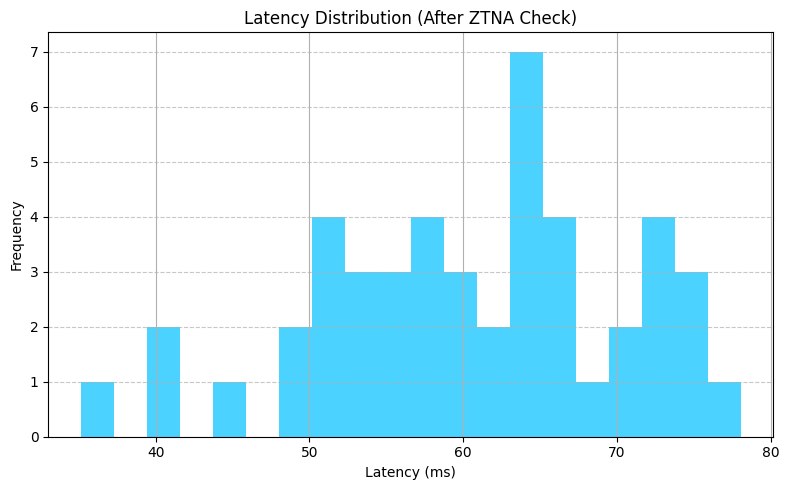

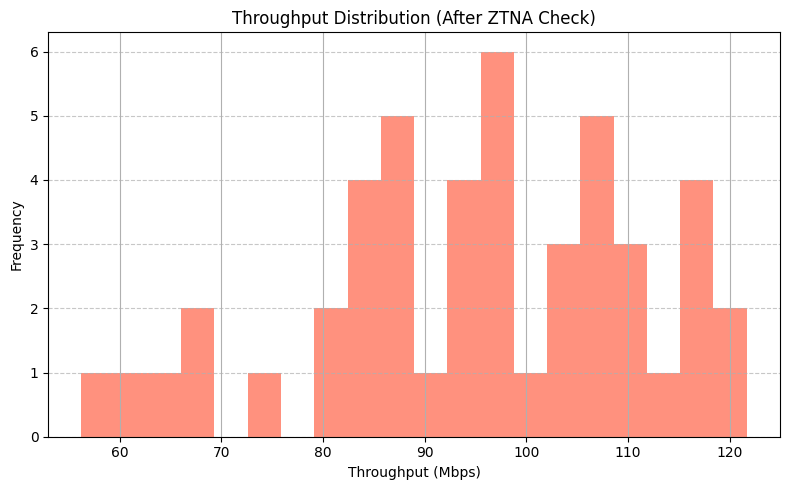


Access Status Counts:
ZTNA_Status
active     41
revoked     6
Name: count, dtype: int64


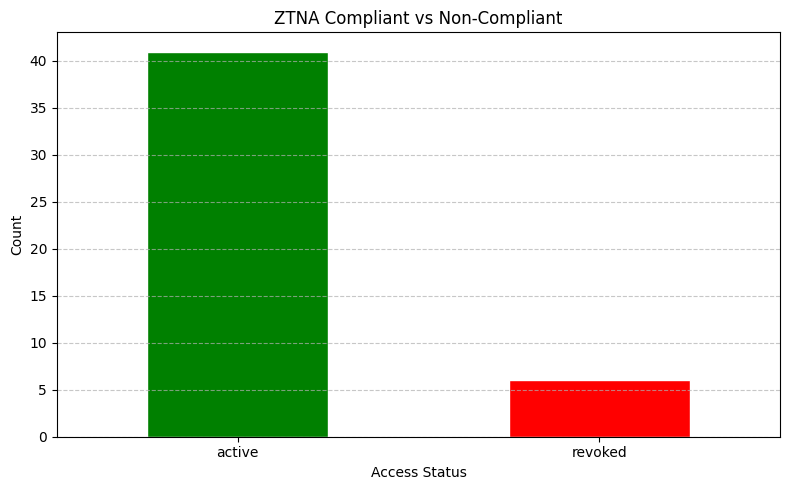

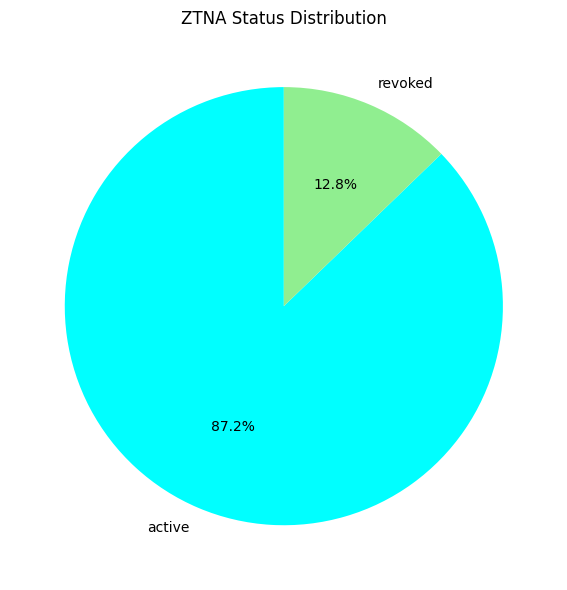

In [ ]:
#ZTNA
import random
import pandas as pd
import numpy as np

# ZTNA (Zero Trust Network Access)
class ZTNA:
    def __init__(self):
        self.active_sessions = {}

    def authenticate(self, device):
        """Authenticate and establish a session."""
        if device["device_id"] not in self.active_sessions:
            self.active_sessions[device["device_id"]] = "active"
            #print(f"{device['device_id']} session authenticated via ZTNA.")
            return True
        return False

    def revoke_access(self, device):
        """Revoke access dynamically based on compliance changes."""
        if device["device_id"] in self.active_sessions:
            del self.active_sessions[device["device_id"]]
            print(f"Access revoked for {device['device_id']} via ZTNA.")
            return True
        return False


# Load the previous module's output (devices with access statuses)
df_status = pd.read_csv("NAC_Compliant_Data.csv")
#print(df_status)
# Filter devices with "Active" status
active_devices = df_status[df_status["Access_Status"] == "Active"]

# Randomly assign new statuses to active devices
def generate_new_status():
    return np.random.choice(["active", "revoked"], p=[0.9, 0.1])

active_devices["ZTNA_Status"] = active_devices["Device_ID"].apply(lambda _: generate_new_status())
#print(active_devices)
# Initialize ZTNA system
ztna_system = ZTNA()

# Process devices through ZTNA
for index, device in active_devices.iterrows():
    device_info = {
        "device_id": device["Device_ID"],
        "ztna_status": device["ZTNA_Status"],
    }

    # Authenticate or revoke access based on the new status
    if device_info["ztna_status"] == "active":
        ztna_system.authenticate(device_info)

        # Increase latency by a random value (e.g., 5 to 10 ms)
        latency_increase = random.randint(1, 5)
        active_devices.loc[index, "Latency_ms"] += latency_increase

        # Decrease throughput by a random percentage (e.g., 5% to 15%)
        throughput_decrease_percent = random.randint(1, 10)
        active_devices.loc[index, "Throughput_Mbps"] *= (1 - throughput_decrease_percent / 100)

    elif device_info["ztna_status"] == "revoked":
        ztna_system.revoke_access(device_info)

# Save the updated statuses to a new CSV file
active_devices.to_csv("ZTNA_Device_Data.csv", index=False)
print("\nZTNA statuses have been processed and saved to 'ZTNA_Device_Data.csv'.")
print(active_devices.head())

# Analyze the impact on latency and throughput
latency_avg = active_devices["Latency_ms"].mean()
throughput_avg = active_devices["Throughput_Mbps"].mean()

print(f"\nAverage Latency: {latency_avg:.2f} ms")
print(f"Average Throughput: {throughput_avg:.2f} Mbps")

# Plot latency and throughput distributions
plt.figure(figsize=(8, 5))
active_devices["Latency_ms"].hist(bins=20, alpha=0.7, color="#00BFFF")
plt.title("Latency Distribution (After ZTNA Check)")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
active_devices["Throughput_Mbps"].hist(bins=20, alpha=0.7, color="#FF6347")
plt.title("Throughput Distribution (After ZTNA Check)")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

access_counts = active_devices.iloc[:, -1].value_counts()  # Get the last column dynamically

# Print the counts
print("\nAccess Status Counts:")
print(access_counts)

import matplotlib.pyplot as plt

# Assuming `access_counts` contains the counts of "Yes" and "No" values
# Example: access_counts = pd.Series({'Yes': 3, 'No': 2})

# Bar Chart
plt.figure(figsize=(8, 5))
access_counts.plot(kind='bar', color=['green', 'red'], edgecolor='WHITE')
plt.title("ZTNA Compliant vs Non-Compliant")
plt.xlabel("Access Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
access_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['CYAN', '#90EE90'], labels=access_counts.index)
plt.title("ZTNA Status Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.tight_layout()
plt.show()

Data generation for firewall traffic

In [ ]:
import pandas as pd
import random
from scapy.all import Ether, IP, TCP, UDP, sendp

# Load your dataset
df = pd.read_csv("ZTNA_Device_Data.csv")

# Function to simulate traffic generation
def generate_traffic(df):
    packets = []

    from scapy.all import Ether, IP, TCP, UDP, sendp
import pandas as pd
import random

# Load the dataset
df = pd.read_csv("ZTNA_Device_Data.csv")

# Function to generate traffic
def generate_traffic(device_data):
    packets = []

    # Iterate over the dataset to simulate traffic
    for _, row in device_data.iterrows():
        # Check if the access status is 'Active'
        if row["Access_Status"] == "Active":
            # Extract data for traffic generation
            ip_src = row["IP_Address"]
            mac_src = row["MAC_Address"]
            port = row["Port"]
            device_id = row["Device_ID"]
            timestamp = row["Timestamp"]
            latency = row["Latency_ms"]
            throughput = row["Throughput_Mbps"]

            # Simulate allowed ports
            dest_port = port if port in [443, 8443] else random.choice([443, 8443])
            dest_ip = f"10.0.{random.randint(0, 255)}.{random.randint(1, 255)}"  # Random destination IP

            # Create a TCP or UDP packet
            packet_type = random.choice([TCP, UDP])
            packet = Ether(src=mac_src) / IP(src=ip_src, dst=dest_ip) / packet_type(dport=dest_port)

            # Add packet metadata for logging
            packets.append({
                "Device_ID": device_id,
                "Source_MAC": mac_src,
                "Source_IP": ip_src,
                "Destination_IP": dest_ip,
                "Protocol": "TCP" if packet_type == TCP else "UDP",
                "Destination_Port": dest_port,
                "Timestamp": timestamp,
                "Latency_ms": latency,
                "Throughput_Mbps": throughput
            })
            #print(f"Generated packet: {device_id} from {ip_src} to {dest_ip} on port {dest_port}.")

    # Save traffic data to CSV
    traffic_df = pd.DataFrame(packets)
    traffic_df.to_csv("Active_Device_Traffic_Details.csv", index=False)
    print(f"Traffic data saved to 'Active_Device_Traffic_Details.csv'.")
    print(traffic_df.head())

    # Send all packets (Optional for real network simulation)
    # for packet in packets:
    #     sendp(packet, verbose=False)
    print(f"Total {len(packets)} packets generated.")

# Run the traffic generator
generate_traffic(df)


Traffic data saved to 'Active_Device_Traffic_Details.csv'.
   Device_ID         Source_MAC      Source_IP Destination_IP Protocol  \
0   Device_2  6c:86:46:16:75:f8   192.168.1.29   10.0.171.179      UDP   
1   Device_3  12:90:3a:81:22:dc  194.181.19.54   10.0.178.114      UDP   
2   Device_8  88:aa:c7:6a:37:a0   192.168.1.30     10.0.76.43      UDP   
3  Device_12  20:6e:aa:16:ae:b2   192.168.1.99   10.0.149.164      UDP   
4  Device_13  80:b7:77:05:7b:5c  192.168.1.237    10.0.125.95      UDP   

   Destination_Port            Timestamp  Latency_ms  Throughput_Mbps  
0               443  2024-11-17 04:48:45       75.36       106.547364  
1               443  2024-05-31 19:46:26       63.37        68.348164  
2              8443  2024-05-18 14:57:29       51.81        97.820525  
3               443  2024-09-22 03:35:44       51.58        88.818548  
4              8443  2024-04-03 02:24:03       58.33        85.763788  
Total 47 packets generated.


Firewall Filtering

TCP-only firewall rules generated and saved to 'Firewall_Rules_TCP_Only.csv'.
   Action         Source_MAC       Source_IP Destination_IP Protocol  \
0   ALLOW  7e:ac:fb:8b:0b:d3   192.168.1.225     10.0.82.16      TCP   
1   ALLOW  bc:23:95:01:13:e5   192.168.1.216    10.0.143.86      TCP   
2   ALLOW  0e:34:a0:08:b1:72    192.168.1.87   10.0.210.221      TCP   
3   ALLOW  0c:d3:66:02:59:ef  60.203.109.189   10.0.202.164      TCP   
4   ALLOW  f2:3a:f5:4b:26:21   192.168.1.177   10.0.156.239      TCP   
5   ALLOW  b6:9a:c0:cd:51:0e    192.168.1.56     10.0.4.243      TCP   
6   ALLOW  38:74:0b:a1:88:f1   192.168.1.188   10.0.134.138      TCP   
7   ALLOW  ea:c2:8d:07:3f:4f   192.168.1.145    10.0.78.213      TCP   
8   ALLOW  fa:01:48:b3:ce:4e   192.168.1.133   10.0.136.205      TCP   
9   ALLOW  d8:7b:41:b5:a6:e1   192.168.1.111    10.0.89.209      TCP   
10  ALLOW  48:9f:ca:ca:85:09    192.168.1.42   10.0.191.172      TCP   
11  ALLOW  3a:2d:fb:2b:02:e3    192.168.1.24    10.0.204.4

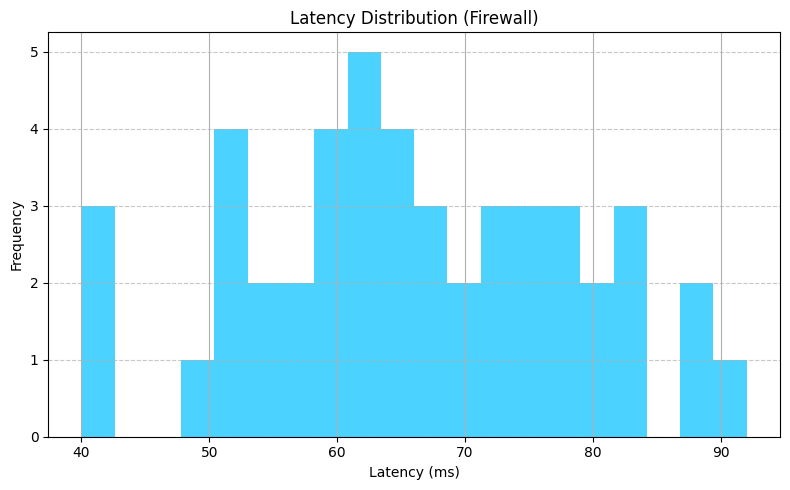

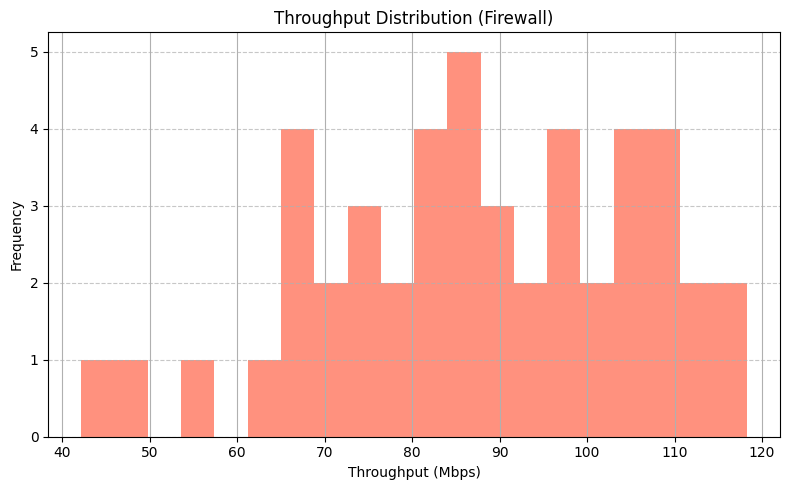


Access Status Counts:
Action
ALLOW    23
DENY      2
Name: count, dtype: int64


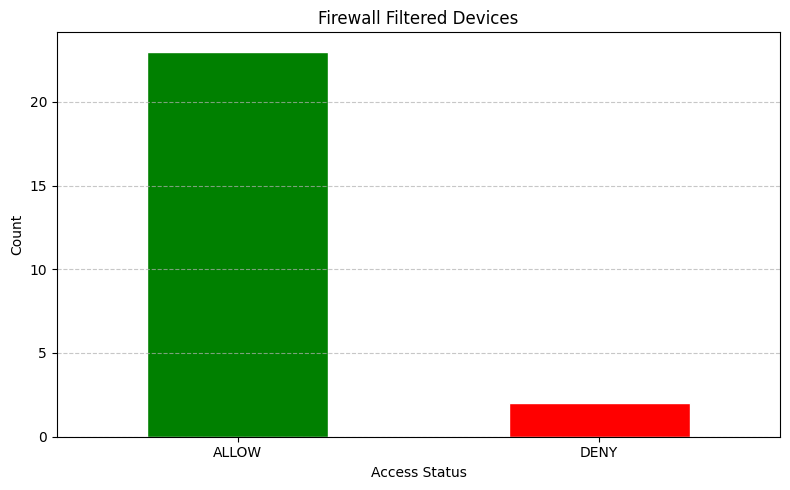

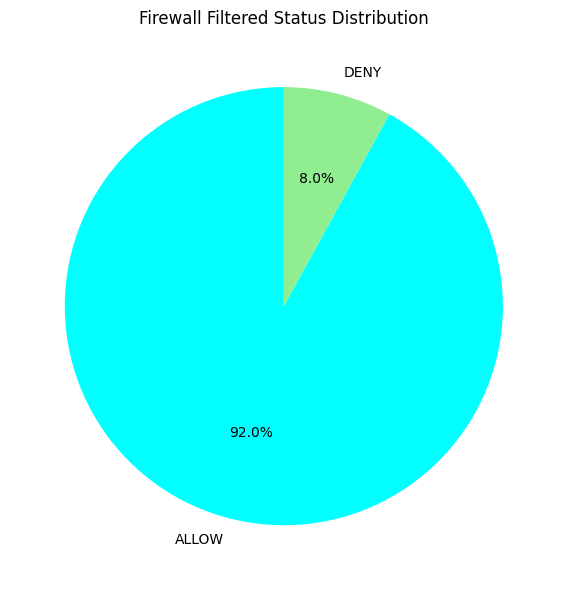

In [ ]:
import pandas as pd

# Load the traffic data
traffic_df = pd.read_csv("Active_Device_Traffic_Details.csv")

# Function to generate firewall rules
def generate_tcp_only_firewall_rules(traffic_data):
    firewall_rules = []

    # Iterate over unique rows to create specific rules for TCP
    for index, row in traffic_data.iterrows():
        if row["Protocol"] == "TCP":

            rule = {
                "Action": "ALLOW",  # Allow TCP traffic matching these attributes
                "Source_MAC": row["Source_MAC"],
                "Source_IP": row["Source_IP"],
                "Destination_IP": row["Destination_IP"],
                "Protocol": row["Protocol"],
                "Destination_Port": row["Destination_Port"],
            }
            firewall_rules.append(rule)

    # Add a rule to explicitly deny all UDP traffic
    firewall_rules.append({
        "Action": "DENY",
        "Source_MAC": "*",
        "Source_IP": "*",
        "Destination_IP": "*",
        "Protocol": "UDP",
        "Destination_Port": "*",
    })

    # Add a default deny rule for all other traffic not specified
    firewall_rules.append({
        "Action": "DENY",
        "Source_MAC": "*",
        "Source_IP": "*",
        "Destination_IP": "*",
        "Protocol": "*",
        "Destination_Port": "*",
    })

    # Convert to DataFrame for easy export and visualization
    rules_df = pd.DataFrame(firewall_rules)
    rules_df.to_csv("Firewall_Rules_TCP_Only.csv", index=False)
    print("TCP-only firewall rules generated and saved to 'Firewall_Rules_TCP_Only.csv'.")
    return rules_df

# Generate TCP-only firewall rules
firewall_rules_df = generate_tcp_only_firewall_rules(traffic_df)

# Display the rules
print(firewall_rules_df)

# Update latency and throughput for TCP traffic
def adjust_latency_throughput(row):
    if row["Protocol"] == "TCP":
        # Increase latency by a random value (e.g., 5 to 15 ms)
        row["Latency_ms"] += random.randint(5, 15)

        # Decrease throughput by a random percentage (e.g., 10% to 25%)
        throughput_decrease_percent = random.randint(10, 25)
        row["Throughput_Mbps"] *= (1 - throughput_decrease_percent / 100)
    return row

# Apply adjustments
traffic_df = traffic_df.apply(adjust_latency_throughput, axis=1)

# Save the updated traffic data
traffic_df.to_csv("Firewall_Data.csv", index=False)
print("Updated traffic details with latency and throughput adjustments saved to 'Updated_Traffic_Details.csv'.")

# Access Status Counts for Visualization
protocol_counts = traffic_df["Protocol"].value_counts()

# Analyze latency and throughput distributions
latency_avg = traffic_df["Latency_ms"].mean()
throughput_avg = traffic_df["Throughput_Mbps"].mean()
print(f"\nAverage Latency after adjustment: {latency_avg:.2f} ms")
print(f"Average Throughput after adjustment: {throughput_avg:.2f} Mbps")

# Visualize distributions
plt.figure(figsize=(8, 5))
traffic_df["Latency_ms"].hist(bins=20, alpha=0.7, color="#00BFFF")
plt.title("Latency Distribution (Firewall)")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
traffic_df["Throughput_Mbps"].hist(bins=20, alpha=0.7, color="#FF6347")
plt.title("Throughput Distribution (Firewall)")
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

import pandas as pd

# Assuming 'updated_df' is the DataFrame with the last column having "Yes" and "No" values
# Count the occurrences of each value in the last column
access_counts = firewall_rules_df.iloc[:, 0].value_counts()  # Get the last column dynamically

# Print the counts
print("\nAccess Status Counts:")
print(access_counts)

import matplotlib.pyplot as plt

# Assuming `access_counts` contains the counts of "Yes" and "No" values
# Example: access_counts = pd.Series({'Yes': 3, 'No': 2})

# Bar Chart
plt.figure(figsize=(8, 5))
access_counts.plot(kind='bar', color=['green', 'red'], edgecolor='WHITE')
plt.title("Firewall Filtered Devices")
plt.xlabel("Access Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
access_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['CYAN', '#90EE90'], labels=access_counts.index)
plt.title("Firewall Filtered Status Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.tight_layout()
plt.show()